<a href="https://colab.research.google.com/github/tombresee/DATACAMP_UML/blob/master/ENTER/notebooks/L1_Clustering_for_dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/ML-Challenge/week4-unsupervised-learning/blob/master/L1.Clustering%20for%20dataset%20exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

Learn how to discover the underlying groups (or "clusters") in a dataset. By the end of this lesson, we'll be clustering companies using their stock market prices, and distinguishing different species by clustering their measurements.

# Setup

In [37]:
# Download lesson datasets
# Required if you're using Google Colab
!wget "https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip"
!unzip -o datasets.zip

--2020-09-26 00:04:03--  https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ML-Challenge/week4-unsupervised-learning/master/datasets.zip [following]
--2020-09-26 00:04:04--  https://raw.githubusercontent.com/ML-Challenge/week4-unsupervised-learning/master/datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2227561 (2.1M) [application/zip]
Saving to: ‘datasets.zip.1’

datasets.zip.1      100%[===================>]   2.12M  9.58MB/s    in 0.2s    

2020-09-26 00:04:04 (9.58 MB/s) - ‘datasets.zip.1’ saved [2227561/

In [38]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [39]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Unsupervised learning

Unsupervised learning is a class of machine learning techniques for discovering patterns in data. For instance, finding the natural "clusters" of customers based on their purchase histories, or searching for patterns and correlations among these purchases, and using these patterns to express the data in compressed form.

These are examples of unsupervised learning techniques called "clustering" and "dimension reduction". 

## Supervised vs unsupervised learning

Unsupervised learning is defined in opposition to supervised learning. An example of supervised learning is using the measurements of tumors to classify them as benign or cancerous. In this case, the pattern discovery is guided, or "supervised", so that the patterns are as useful as possible for predicting the label: benign or cancerous. Unsupervised learning, in contrast, is learning without labels. It is pure pattern discovery, unguided by a prediction task.

We'll start by learning about clustering but before we begin, let's introduce a dataset and fix some terminology. 

## Iris dataset

The iris dataset consists of the measurements of many iris plants of three different species. There are four measurements: petal length, petal width, sepal length and sepal width. These are the features of the dataset.

![Iris](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/1-1.png?raw=1)

Throughout this lesson, datasets like this will be written as two-dimensional `numpy` arrays. The columns of the array will correspond to the features. The measurements for individual plants are the samples of the dataset. These correspond to rows of the array. 

The samples of the iris dataset have four measurements, and so correspond to points in a four-dimensional space. This is the dimension of the dataset.

We can't visualize four dimensions directly, but using unsupervised learning techniques we can still gain insight. In this lesson, we'll cluster these samples using k-means clustering.

## k-means clustering

k-means finds a specified number of clusters in the samples. It's implemented in the scikit-learn or "sklearn" library.

Let's see kmeans in action on some samples from the iris dataset. To start, we import kmeans from scikit-learn.

```
from sklearn.cluster import KMeans
```

Then create a kmeans model, specifying the number of clusters we want to find. Let's specify 3 clusters, since there are three species of iris.

```
model = KMeans(n_clusters=3)
```

Now call the fit method of the model, passing the array of samples. This fits the model to the data, by locating and remembering the regions where the different clusters occur.

```
model.fit(samples)
```

Then we can use the predict method of the model on these same samples. This returns a cluster label for each sample, indicating to which cluster a sample belongs.

```
labels = model.predict(samples)
```

If someone comes along with some new iris samples, k-means can determine to which clusters they belong without starting over. k-means does this by remembering the mean (or average) of the samples in each cluster. These are called the "centroids". New samples are assigned to the cluster whose centroid is closest.

Suppose we've got an array of new samples. To assign the new samples to the existing clusters, we pass the array of new samples to the predict method of the kmeans model. This returns the cluster labels of the new samples.

```
new_labels = model.predict(new_samples)
```

## Scatter plots

Further on, we'll learn how to evaluate the quality of our clustering. But for now, let's visualize our clustering of the iris samples using scatter plots. 

Here is a scatter plot of the sepal length vs petal length of the iris samples. Each point represents an iris sample, and is colored according to the cluster of the sample. 

![Scatter plot](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/1-2.png?raw=1)

To create a scatter plot like this, use PyPlot. Firstly, import PyPlot. It is conventionally imported as plt.

```
import matplotlib.pyplot as plt
```

Now get the x- and y- co-ordinates of each sample. Sepal length is in the 0th column of the array, while petal length is in the 2nd column.

```
xs = samples[:,0]
ys = samples[:,2]
```

Now call the plt dot scatter function, passing the x- and y-co-ordinates and specifying c=labels to colour by cluster label.

```
plt.scatter(xs, ys, c=labels)
```

When we are ready to show the plot, we call `plt.show`.

```
plt.show()
```

## Clustering 2D points

We are given an array `points` of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Let's make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

In [40]:
xs = utils.points[:, 0]
ys = utils.points[:, 1]

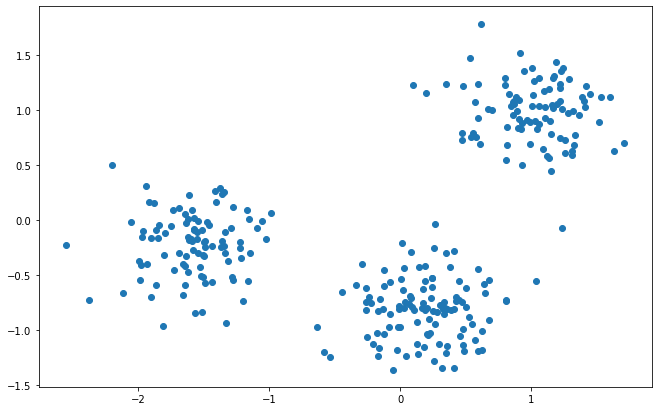

In [41]:
plt.scatter(xs, ys)
plt.show()

From the scatter plot above, we can see that the points seem to separate into 3 clusters. We'll now create a KMeans model to find 3 clusters, and fit it to our data points. After the model has been fit, we'll obtain the cluster labels for some new points using the `.predict()` method.

In [42]:
# Import KMeans
from sklearn.cluster import KMeans

In [43]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

In [44]:
# Fit model to points
model.fit(utils.points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
# Determine the cluster labels of new_points: labels
labels = model.predict(utils.new_points)

In [46]:
# Print cluster labels of new_points
print(labels)

[0 1 2 0 1 0 1 1 1 2 0 1 1 2 2 1 2 2 1 1 2 1 0 1 0 2 1 2 2 0 0 1 1 1 2 0 1
 1 0 1 2 0 0 2 0 1 2 2 1 1 1 1 2 2 0 0 2 2 2 0 0 1 1 1 0 1 2 1 0 2 0 0 0 1
 0 2 2 0 1 2 0 2 0 1 2 1 2 0 1 1 1 0 1 1 0 2 2 2 2 0 1 0 2 2 0 0 1 0 2 2 0
 2 2 2 1 1 1 1 2 2 1 0 1 2 1 0 2 1 2 2 1 2 1 2 0 1 0 0 1 2 0 1 0 0 2 1 1 0
 2 0 2 1 0 2 2 0 2 1 1 2 1 2 2 1 1 0 1 1 2 0 2 0 0 1 0 1 1 0 0 2 0 0 0 2 1
 1 0 2 0 2 2 1 1 1 0 1 1 1 2 2 0 1 0 0 0 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2
 1 1 0 2 0 0 2 0 2 0 2 1 1 2 1 1 1 2 0 0 2 1 1 2 1 2 2 1 2 2 0 2 0 0 0 1 2
 2 2 0 1 0 2 0 2 2 1 0 0 0 2 1 1 1 0 1 2 2 1 0 0 2 0 0 2 0 1 0 2 2 2 2 1 2
 2 1 1 0]


We've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful. In the next example, we'll inspect our clustering with a scatter plot!

## Inspect the clustering

Let's now inspect the clustering we performed above.

In [47]:
# Assign the columns of new_points: xs and ys
xs = utils.new_points[:,0]
ys = utils.new_points[:,1]

In [48]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

In [49]:
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

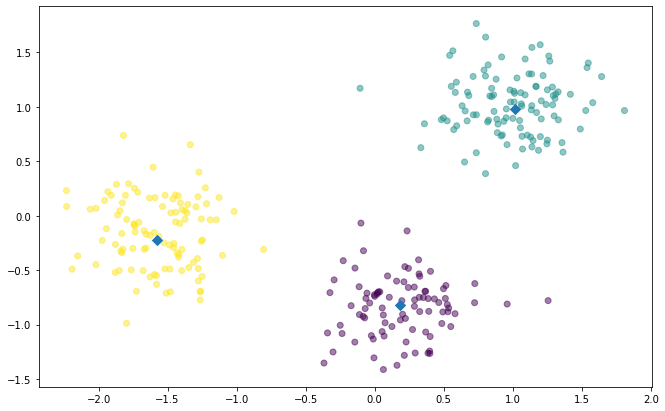

In [50]:
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, alpha=0.5, c=labels)

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

The clustering looks great! But how can we be sure that 3 clusters is the correct choice? In other words, how can we evaluate the quality of a clustering? Next, we will explain how to evaluate a clustering!

# Evaluating a clustering

We used k-means to cluster the iris samples into three clusters. But how can we evaluate the quality of this clustering?

A direct approach is to compare the clusters with the iris species. We'll learn about this first, before considering the problem of how to measure the quality of a clustering in a way that doesn't require our samples to come pre-grouped into species.

This measure of quality can then be used to make an informed choice about the number of clusters to look for.

## Iris: clusters vs species

Firstly, let's check whether the 3 clusters of iris samples have any correspondence to the iris species. The correspondence is described by this table.


| species labels | setosa | versicolor | virginica |
| :------------- | -----: | ---------: | --------: |
| 0              | 0      | 2          | 36        |
| 1              | 50     | 0          | 0         |
| 2              | 0      | 48         | 14        |

There is one column for each of the three species of iris: setosa,versicolor and virginica, and one row for each of the three cluster labels: 0, 1 and 2. 

The table shows the number of samples that have each possible cluster label/species combination. For example, we see that cluster 1 corresponds perfectly with the species setosa. On the other hand, while cluster 0 contains mainly virginica samples, there are also some virginica samples in cluster 2. Tables like these are called "cross-tabulations". To construct one, we are going to use the pandas library.

## Cross tabulation with pandas

Let's assume the species of each sample is given as a list of strings. 
 
Import pandas, and then create a two-column dataframe, where the first column is cluster labels and the second column is the iris species, so that each row gives the cluster label and species of a single sample.

```
import pandas as pd

df = pandas.DataFrame({'labels': labels, 'species': species})
```

Now use the pandas `crosstab` function to build the cross tabulation, passing the two columns of the dataframe.

```
ct = pd.crosstab(df['labels'], df['species'])

print(ct)
```

Cross tabulations like these provide great insights into which sort of samples are in which cluster. 

But in most datasets, the samples are not labeled by species. How can the quality of a clustering be evaluated in these cases?

## Measuring clustering quality

We need a way to measure the quality of a clustering that uses only the clusters and the samples themselves. A good clustering has tight clusters, meaning that the samples in each cluster are bunched together, not spread out.

How spread out the samples within each cluster are can be measured by the "inertia". Intuitively, inertia measures how far samples are from their centroids. We can find the precise definition in the scikit-learn documentation. We want clusters that are not spread out, so lower values of the inertia are better.

The inertia of a kmeans model is measured automatically when any of the fit methods are called, and is available afterwards as the `inertia_` attribute.

In fact, kmeans aims to place the clusters in a way that minimizes the inertia. Here is a plot of the inertia values of clusterings of the iris dataset with different numbers of clusters.

![Inertia](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/1-3.png?raw=1)

Our kmeans model with 3 clusters has relatively low inertia, which is great. But notice that the inertia continues to decrease slowly. So what's the best number of clusters to choose? Ultimately, this is a trade-off.

A good clustering has tight clusters (meaning low inertia). But it also doesn't have too many clusters. A good rule of thumb is to choose an elbow in the inertia plot, that is, a point where the inertia begins to decrease more slowly. For example, by this criterion, 3 is a good number of clusters for the iris dataset.

## How many clusters of grain?

So we learned how to choose a good number of clusters for a dataset using the k-means inertia graph. We are given an array `grains` containing the measurements of samples of grain, such as area, perimeter, length, and several others. What's a good number of clusters in this case?

This dataset was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds).

In [51]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(utils.grain)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

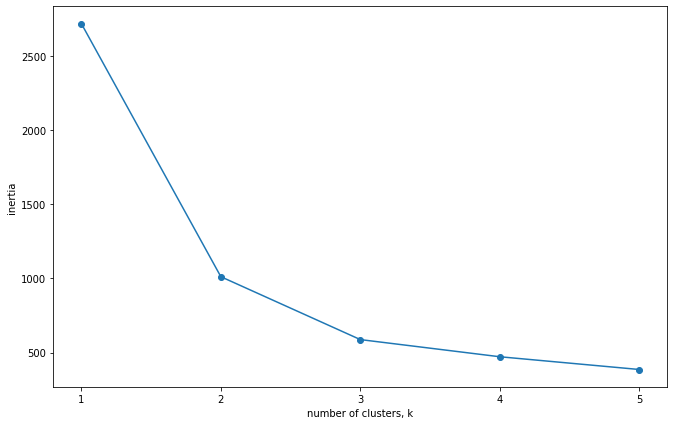

In [52]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

## Evaluating the grain clustering

In the previous example, we observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this example, we cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [53]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

In [54]:
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(utils.grain)

In [55]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': utils.varieties})

In [56]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                       2          60          10
2                      68           9           0


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data we are working with, the clustering may not always be this good. Is there anything we can do in such situations to improve the clustering? We'll find out in the next section!

# Transforming features for better clusterings

Let's look now at another dataset: the Piedmont wines dataset. We have 178 samples of red wine from the Piedmont region of Italy. The features measure chemical composition, like alcohol content, and visual properties like color intensity. The samples come from 3 distinct varieties of wine.

Let's take the array of samples and use KMeans to find 3 clusters.

```
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

labels.model.fit_predict(samples)
```

There are three varieties of wine, so let's use pandas `crosstab` to check the cluster label - wine variety correspondence.

```
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

ct = pd.crosstab(df['labels']. df['varieties'])

print(ct)
```

| varieties labels | Barbera | Barolo | Grignolino |
| :--------------- | -----: | ------: | ---------: |
| 0                | 0      | 2       | 36         |
| 1                | 50     | 0       | 0          |
| 2                | 0      | 48      | 14         |

As we can see, this time things haven't worked out so well. The KMeans clusters don't correspond well with the wine varieties.

## Feature variances

The problem is that the features of the wine dataset have very different variances. The variance of a feature measures the spread of its values. For example, the `malic` acid feature has a higher variance than the `od280` feature, and this can also be seen in their scatter plot. 

![Feature variance](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/1-4.png?raw=1)

The differences in some of the feature variances is enormous, as seen here, for example, in the scatter plot of the od280 and proline features.

![Feature variance](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/1-5.png?raw=1)

## StandardScaler

In KMeans clustering, the variance of a feature corresponds to its influence on the clustering algorithm. 

To give every feature a chance, the data needs to be transformed so that features have equal variance. This can be achieved with the `StandardScaler` from scikit-learn. It transforms every feature to have mean 0 and variance 1. The resulting "standardized" features can be very informative.

Using standardized `od280` and `proline`, for example, the three wine varieties are much more distinct.

![Standardized](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/1-6.png?raw=1)


Let's see the StandardScaler in action. First, import StandardScaler from sklearn.preprocessing.

```
from sklearn.preprocessing import StandardScaler
```

Then create a StandardScaler object, and fit it to the samples.

```
scaler = StandardScaler()

scaler.fit(samples)
```

The transform method can now be used to standardize any samples, either the same ones, or completely new ones.

```
samples_scaled = scaler.transform(samples)
```

The APIs of StandardScaler and KMeans are similar, but there is an important difference. StandardScaler transforms data, and so has a transform method. KMeans, in contrast, assigns cluster labels to samples, and this is done using the predict method.

Let's return to the problem of clustering the wines. We need to perform two steps. Firstly, to standardize the data using StandardScaler, and secondly to take the standardized data and cluster it using KMeans. This can be conveniently achieved by combining the two steps using a scikit-learn pipeline. Data then flows from one step into the next, automatically.

The first steps are the same: creating a StandardScaler and a KMeans object.

```
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)
```

After that, import the make_pipeline function from sklearn.pipeline.

```
from sklearn.pipeline import make_pipeline
```

Apply the make_pipeline function to the steps that we want to compose in this case, the scaler and the kmeans objects.

```
pipeline = make_pipeline(scaler, kmeans)
```

Now use the fit method of the pipeline to fit both the scaler and kmeans, and use its predict method to obtain the cluster labels.

```
pipeline.fit(samples)

labels = pipeline.predict(samples)
```

Checking the correspondence between the cluster labels and the wine varieties reveals that this new clustering, incorporating standardization, is fantastic. Its three clusters correspond almost exactly to the three wine varieties. This is a huge improvement on the clustering without standardization.

```
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

ct = pd.crosstab(df['labels'], df['varieties'])
```

| varieties labels | Barbera | Barolo | Grignolino |
| :--------------- | -----: | ------: | ---------: |
| 0                | 0      | 59      | 3          |
| 1                | 48     | 0       | 3          |
| 2                | 0      | 0       | 65         |

StandardScaler is an example of a "preprocessing" step. There are several of these available in scikit-learn, for example `MaxAbsScaler` and `Normalizer`.

## Scaling fish data for clustering

We are given an array `fish_samples` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, we'll need to standardize these features first. In this example, we'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://jse.amstat.org/jse_data_archive.htm).

In [57]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [58]:
# Create scaler: scaler
scaler = StandardScaler()

In [59]:
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

In [60]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

## Clustering the fish data

We'll now use the standardization and clustering pipeline from the previous example to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

In [61]:
# Fit the pipeline to samples
pipeline.fit(utils.fish_samples)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [62]:
# Calculate the cluster labels: labels
labels = pipeline.predict(utils.fish_samples)

In [63]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':utils.species})

In [64]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1            1     0     19      1
2           33     0      1      0
3            0     0      0     13


It looks like the fish data separates really well into 4 clusters!

## Clustering stocks using KMeans

In this example, we'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). We have a NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, we include a `Normalizer` at the beginning of the pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which we used in the previous example. While `StandardScaler()` standardizes **features** (such as the features of the fish data from the previous example) by removing the mean and scaling to unit variance, `Normalizer()` rescales **each sample** - here, each company's stock price - independently of the other.

In [65]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

In [66]:
# Create a normalizer: normalizer
normalizer = Normalizer()

In [67]:
# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

In [68]:
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

In [69]:
# Fit pipeline to the daily price movements
pipeline.fit(utils.movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

## Which stocks move together?

In the previous example, we clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? We'll now inspect the cluster labels from the clustering to find out.

In [70]:
# Predict the cluster labels: labels
labels = pipeline.predict(utils.movements)

In [71]:
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': utils.companies})

In [72]:
# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
56       0                            Wal-Mart
54       0                            Walgreen
39       0                              Pfizer
25       0                   Johnson & Johnson
36       1                    Northrop Grumman
29       1                     Lookheed Martin
4        1                              Boeing
35       2                            Navistar
46       2                      Sanofi-Aventis
32       2                                  3M
52       2                            Unilever
31       2                           McDonalds
58       2                               Xerox
47       2                            Symantec
37       2                            Novartis
44       2                        Schlumberger
49       2                               Total
23       2                                 IBM
43       2                                 SAP
42       2                   Royal Dutch Shell
10       2   

Take a look at the clusters. Are any of the results surprising? In the next lesson, we'll learn about how to communicate results such as this through visualizations.

---
**[Week 4 - Unsupervised Learning](https://radu-enuca.gitbook.io/ml-challenge/unsupervised-learning)**

*Have questions or comments? Visit the ML Challenge Mattermost Channel.*